In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### 1. Loading and Preparing Data for Analysis

In [2]:
data = pd.read_csv("../data/rfm.csv")

# Vérifier les types de données
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5899 entries, 0 to 5898
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     5899 non-null   float64
 1   recency         5899 non-null   int64  
 2   frequency       5899 non-null   int64  
 3   monetary        5899 non-null   float64
 4   pourcentage     5898 non-null   float64
 5   basket_average  5899 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 276.6 KB
None


### 2. Exploring Data Types and Converters

In [3]:
# Statistical summary of the RFM
data.describe()

,customer_id,recency,frequency,monetary,pourcentage,basket_average
count,5899.000000,5899.000000,5899.000000,5899.000000,5898.000000,5.899000e+03
mean,15316.746737,201.646042,6.234955,2795.096680,inf,-inf
std,1716.135886,210.914567,12.815370,13823.791103,NaN,NaN
min,12346.000000,1.000000,0.000000,-1343.240000,0.000000,-inf
25%,13831.500000,25.000000,1.000000,327.800000,0.000000,1.705230e+02
50%,15319.000000,95.000000,3.000000,837.260000,0.000000,2.709400e+02
75%,16800.500000,380.000000,7.000000,2164.385000,1.541748,4.040507e+02
max,18287.000000,739.000000,379.000000,578408.640000,inf,1.320650e+04


### 3. Visualizing Frequency and Monetary Relationship

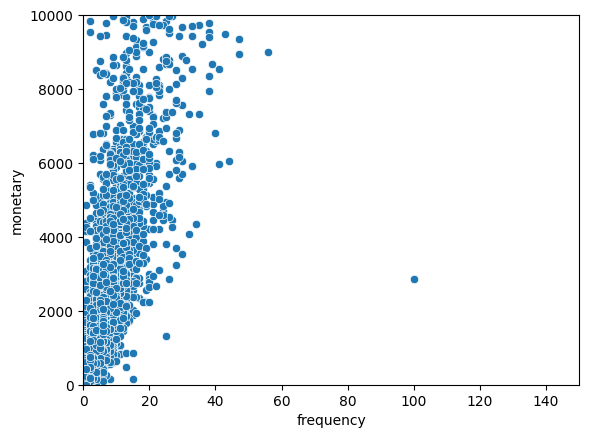

In [4]:
sns.scatterplot(x=data['frequency'], y=data['monetary'])
plt.xlim([0,150])
plt.ylim([0,10000])
plt.show()

### 4. Boxplots for each

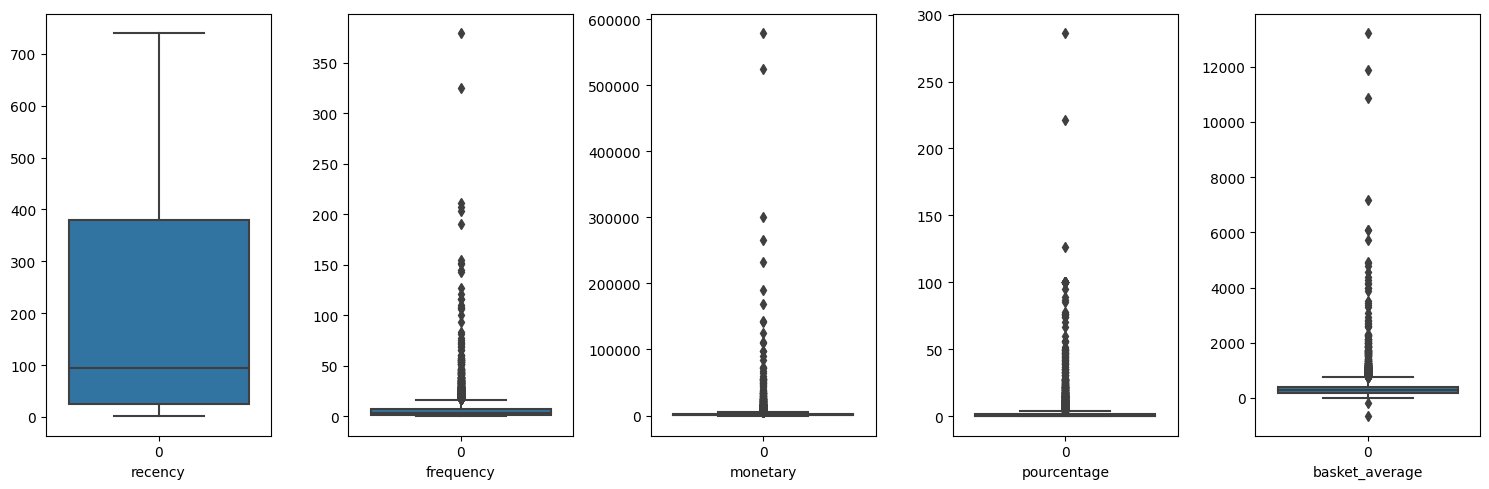

In [5]:
c = ['recency', 'frequency', 'monetary' , 'pourcentage' , 'basket_average']

# Créer une sous-figure avec plusieurs axes pour les boxplots
fig, axes = plt.subplots(nrows=1, ncols=len(c), figsize=(15, 5))

# Parcourir les variables et tracer les boxplots correspondants
for i, var in enumerate(c):
    sns.boxplot(data=data[var], ax=axes[i])
    axes[i].set_xlabel(var)

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher les boxplots
plt.show()



### 5. 3D Scatterplot of Recency, Frequency, and Monetary

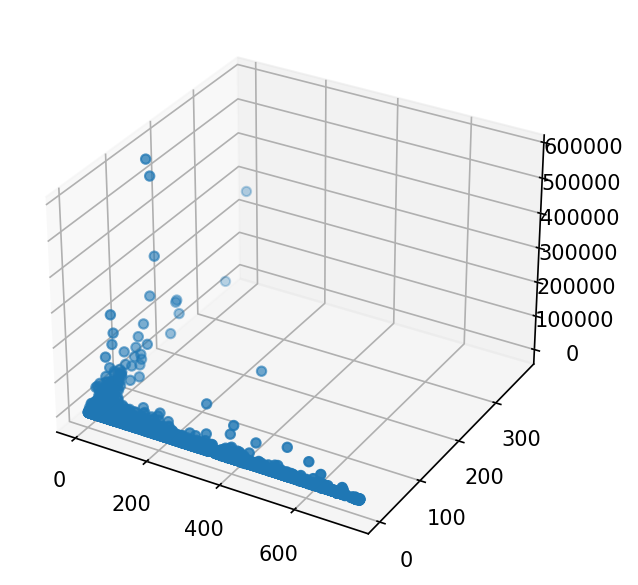

In [6]:
plt.figure(dpi=150)
ax = plt.axes(projection='3d')
ax.scatter3D(data.recency, data.frequency, data.monetary)
# ax.view_init(30,30)

### 6. Removing Outliers using Quantile method

In [7]:
# Définir le seuil de suppression des valeurs extrêmes (par exemple, 0.95 pour garder les 95% des observations)
quantile_threshold = 0.95

# Calculer les quantiles pour chaque variable
quantiles = data.quantile(quantile_threshold)

# Appliquer la suppression des valeurs extrêmes pour chaque variable
filtered_data = data[(data <= quantiles).all(axis=1)]

# Afficher les statistiques résumées de l'ensemble de données filtré
filtered_data.describe()

,customer_id,recency,frequency,monetary,pourcentage,basket_average
count,4546.000000,4546.000000,4546.000000,4546.000000,4546.000000,4546.000000
mean,15209.645403,181.860757,4.503740,1381.638423,1.009775,291.537999
std,1617.424216,182.902735,4.096268,1551.283066,2.041371,159.996013
min,12347.000000,1.000000,1.000000,3.750000,0.000000,3.750000
25%,13812.250000,27.000000,1.000000,340.842500,0.000000,170.739500
50%,15221.000000,90.000000,3.000000,788.635000,0.000000,262.309286
75%,16617.750000,359.000000,6.000000,1794.225000,1.078089,376.196750
max,17991.000000,628.000000,21.000000,8859.820000,11.394443,841.340000


In [8]:
filtered_data = filtered_data.reset_index(drop=True)
filtered_data.head()

,customer_id,recency,frequency,monetary,pourcentage,basket_average
0,12347.0,3,8,4921.53,0.000000,615.191250
1,12348.0,76,5,2019.40,0.000000,403.880000
2,12350.0,311,1,334.40,0.000000,334.400000
3,12351.0,376,1,300.93,0.000000,300.930000
4,12352.0,37,9,1889.21,5.987938,209.912222


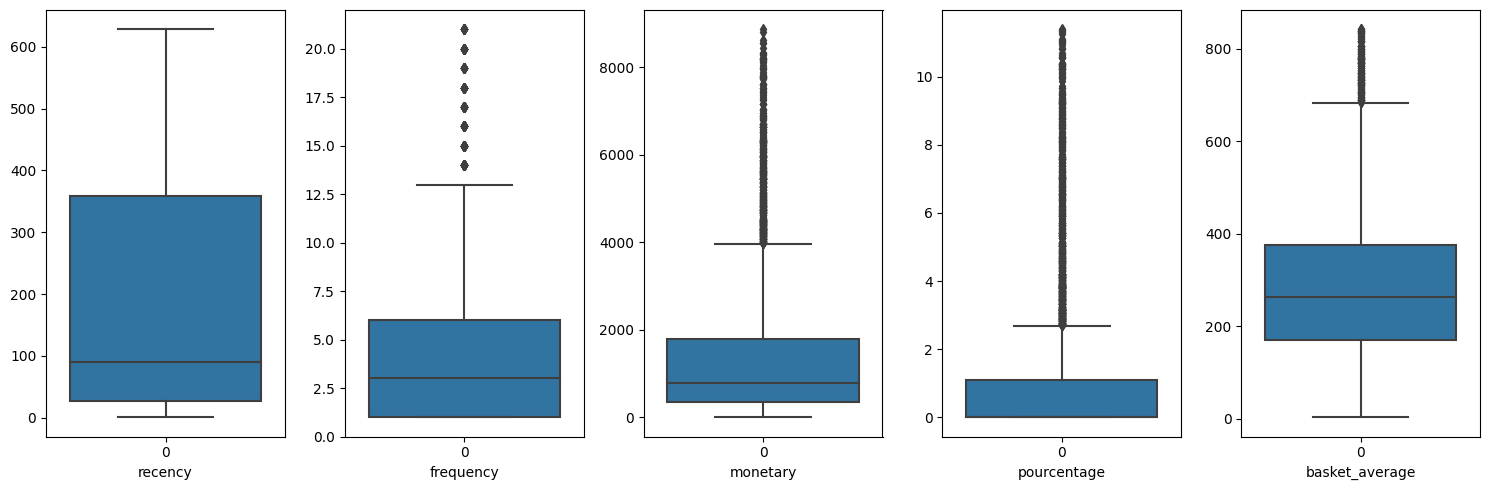

In [9]:
# Spécifiez les colonnes pour les boxplots
c = ['recency', 'frequency', 'monetary', 'pourcentage', 'basket_average']

# Créez une figure avec plusieurs sous-graphiques pour les boxplots
fig, axes = plt.subplots(nrows=1, ncols=len(c), figsize=(15, 5))

# Parcourez les variables et tracez les boxplots correspondants
for i, var in enumerate(c):
    sns.boxplot(data=filtered_data[var], ax=axes[i])
    axes[i].set_xlabel(var)

# Ajustez l'espacement entre les sous-graphiques
plt.tight_layout()

# Affichez les boxplots
plt.show()

### 7. Scaling the Data

In [10]:
from sklearn.preprocessing import StandardScaler, RobustScaler
c = ['recency', 'frequency', 'monetary' , 'pourcentage' , 'basket_average']

rfms = RobustScaler().fit(filtered_data[c]).transform(filtered_data[c])
# rfms = StandardScaler().fit(rfm[c]).transform(rfm[c])

rfms = pd.DataFrame(rfms, columns=c)
rfms

,recency,frequency,monetary,pourcentage,basket_average
0,-0.262048,1.0,2.843639,0.000000,1.717544
1,-0.042169,0.4,0.846828,0.000000,0.689052
2,0.665663,-0.4,-0.312536,0.000000,0.350879
3,0.861446,-0.4,-0.335565,0.000000,0.187974
4,-0.159639,1.2,0.757251,5.554213,-0.255027
...,...,...,...,...,...
4541,0.289157,0.4,0.069689,7.255744,-0.410427
4542,-0.234940,2.0,-0.215287,1.900243,-1.098593
4543,0.873494,-0.4,-0.399967,0.000000,-0.267595
4544,0.442771,0.6,0.504984,0.306030,-0.041603


### 8. ACP

In [11]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pc=pca.fit_transform(rfms)

df_acp=pd.DataFrame(data=pc,columns=['principal_component_1','principal_component_2'])
df_acp.head()

,principal_component_1,principal_component_2
0,-0.326302,2.979831
1,-0.791491,0.812869
2,-1.136235,-0.698134
3,-1.154226,-0.800341
4,4.684216,-0.346093


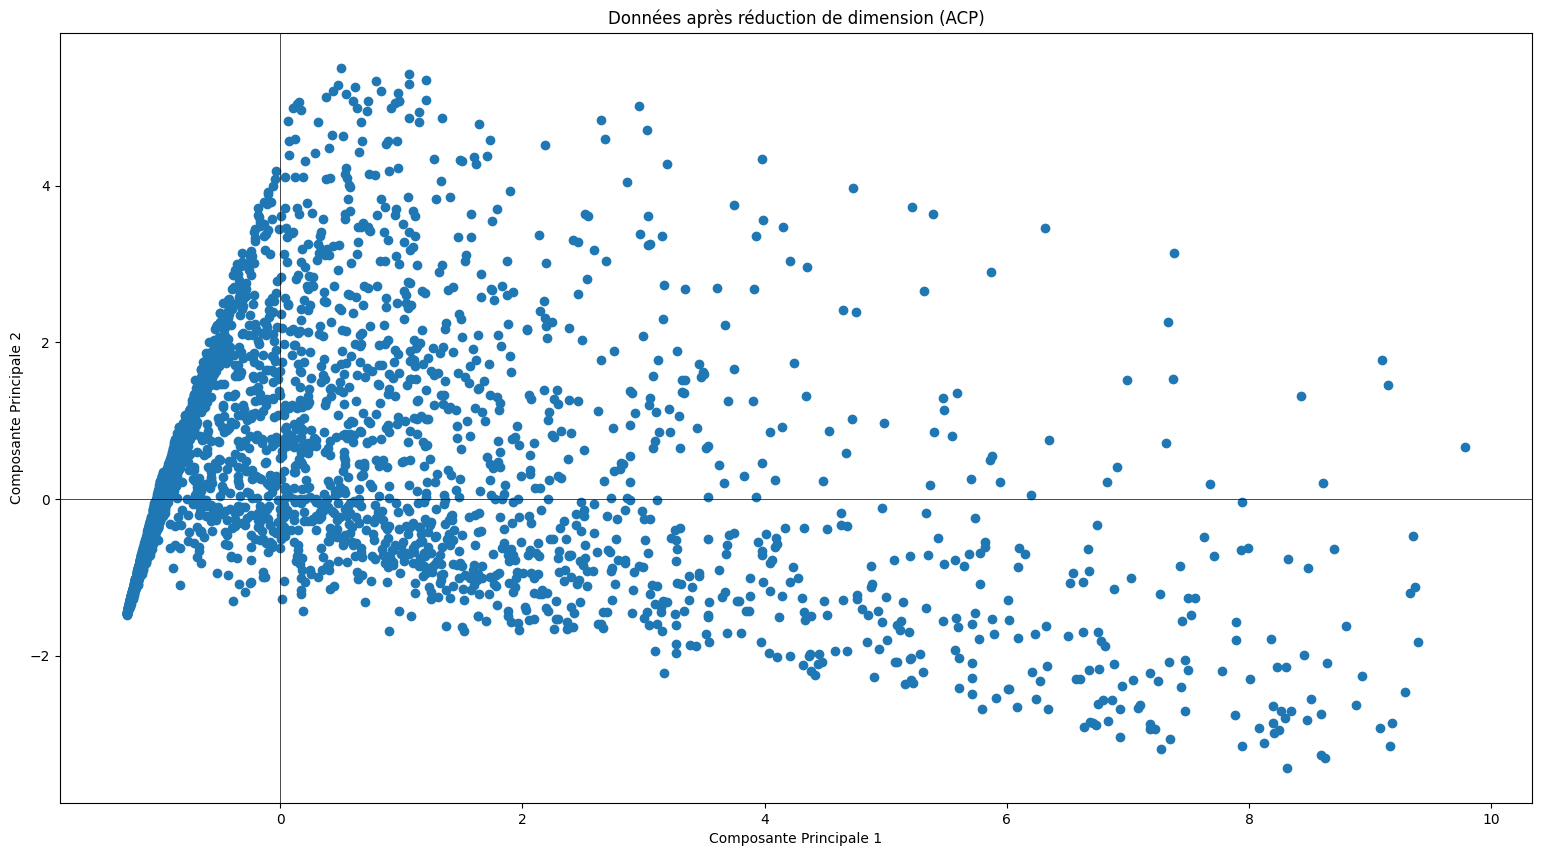

In [12]:
# Créer le graphe
pc1 = df_acp['principal_component_1']
pc2 = df_acp['principal_component_2']



plt.figure(figsize=(19, 10))
plt.scatter(pc1, pc2)
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')

# Ajouter les axes
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

plt.title('Données après réduction de dimension (ACP)')
plt.show()

### 9. Clustering Using K-Means

    Evaluating K-Means Performance by Cluster Number

/home/apprenant/miniconda3/envs/machine_learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/apprenant/miniconda3/envs/machine_learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/apprenant/miniconda3/envs/machine_learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/apprenant/miniconda3/envs/machine_learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

Text(0.5, 1.0, 'KMeans Performance By Cluster Number')

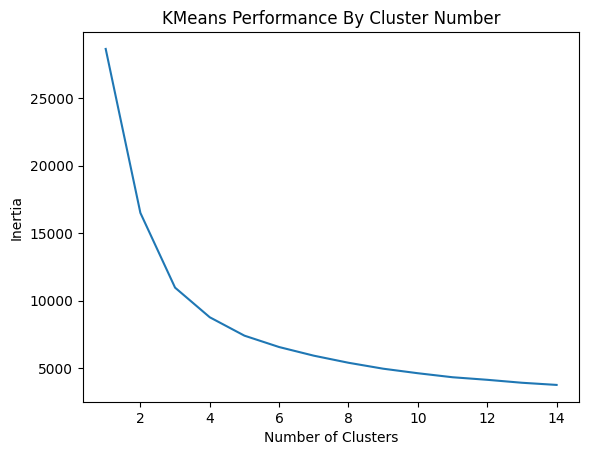

In [13]:
from sklearn.cluster import KMeans

plt.figure(dpi=100)
inertias = []
for i in range(1,15):
    inertias.append(KMeans(n_clusters = i).fit(rfms[c]).inertia_)
plt.plot(range(1,15), inertias)
plt.ylabel('Inertia')
plt.xlabel('Number of Clusters')
plt.title('KMeans Performance By Cluster Number')

    Assigning Clusters to Customers

In [14]:
n = ['principal_component_1',	'principal_component_2']
kp = pd.Series(KMeans(n_clusters = 4, random_state=10, max_iter=3000).fit(df_acp[n]).predict(df_acp[n]))
df_acp['Cluster'] = kp

/home/apprenant/miniconda3/envs/machine_learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
df_acp.Cluster.value_counts()

0    3049
2     742
1     529
3     226
Name: Cluster, dtype: int64

In [16]:
df_acp.Cluster

0       2
1       0
2       0
3       0
4       3
       ..
4541    3
4542    1
4543    0
4544    0
4545    0
Name: Cluster, Length: 4546, dtype: int32

In [17]:


# Nombre de clusters souhaité
n_clusters = 4

# Instanciation de l'algorithme K-means
kmeans = KMeans(n_clusters=n_clusters)

# Apprentissage des clusters
kmeans.fit(df_acp)

# Assignation des clusters pour chaque point
labels = kmeans.labels_

# Coordonnées des centroides de chaque cluster
centroids = kmeans.cluster_centers_

# Affichage des résultats
for i in range(n_clusters):
    cluster_points = df_acp.iloc[labels == i]
    print(f"Cluster {i+1}:")
    print(cluster_points)



/home/apprenant/miniconda3/envs/machine_learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
      principal_component_1  principal_component_2  Cluster
1                 -0.791491               0.812869        0
2                 -1.136235              -0.698134        0
3                 -1.154226              -0.800341        0
5                 -1.114777              -0.695385        0
6                 -0.999005              -0.020087        0
...                     ...                    ...      ...
4539              -1.009086               0.051312        0
4540              -1.207718              -1.185376        0
4543              -1.184541              -0.989270        0
4544              -0.570204               0.277131        0
4545              -1.122440              -0.816039        0

[3049 rows x 3 columns]
Cluster 2:
      principal_component_1  principal_component_2  Cluster
0                 -0.326302               2.979831        2
7                 -0.494839               2.378633        2
8                  0.419804               2.259312   

    Visualizing Customer Clusters in 2D

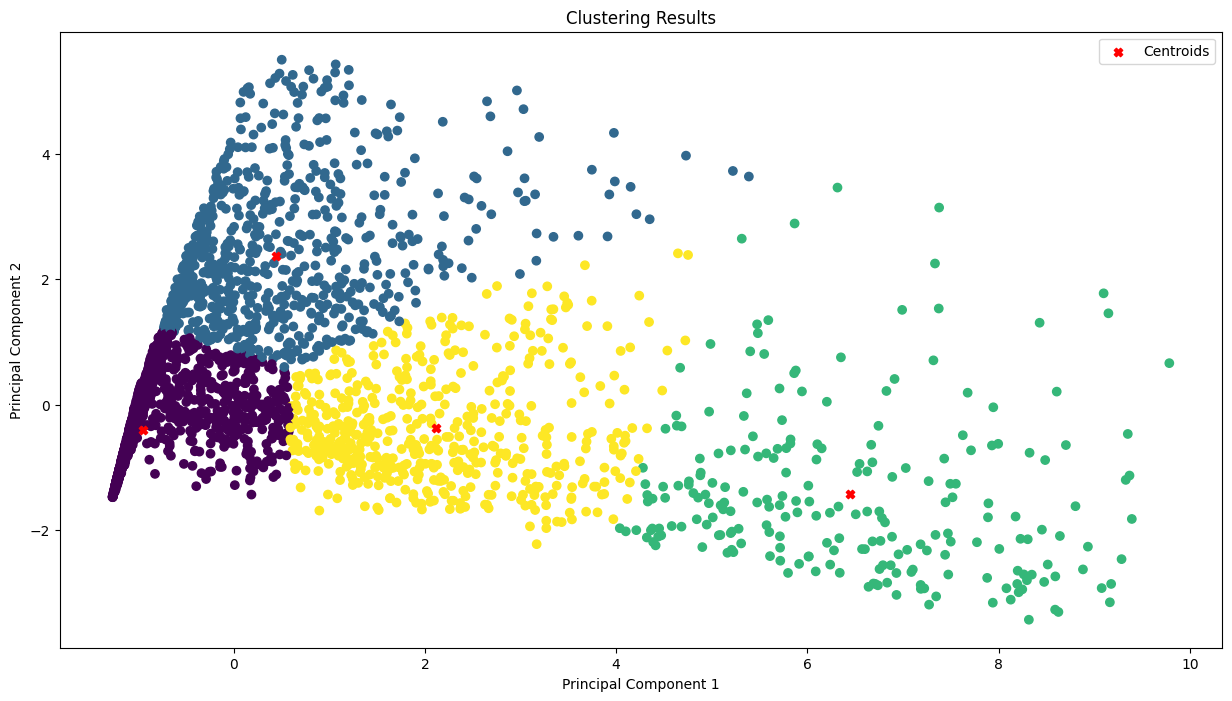

In [32]:
# Set the desired size of the figure
fig, ax = plt.subplots(figsize=(15, 8))

plt.scatter(df_acp.values[:, 0], df_acp.values[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering Results')


plt.legend()
plt.show()

In [33]:
rfms

,recency,frequency,monetary,pourcentage,basket_average
0,-0.262048,1.0,2.843639,0.000000,1.717544
1,-0.042169,0.4,0.846828,0.000000,0.689052
2,0.665663,-0.4,-0.312536,0.000000,0.350879
3,0.861446,-0.4,-0.335565,0.000000,0.187974
4,-0.159639,1.2,0.757251,5.554213,-0.255027
...,...,...,...,...,...
4541,0.289157,0.4,0.069689,7.255744,-0.410427
4542,-0.234940,2.0,-0.215287,1.900243,-1.098593
4543,0.873494,-0.4,-0.399967,0.000000,-0.267595
4544,0.442771,0.6,0.504984,0.306030,-0.041603


    Analyzing Cluster Characteristics
    - Display the means 

In [20]:
# rfms[c + ['Cluster']].groupby('Cluster').mean()

    Visualizing Customer Clusters based on Frequency and Monetary

In [21]:
# plt.scatter(rfm.frequency, rfm.monetary,c=rfm.Cluster)

### 9. Analysis of clusters formed

    Average Recency, Frequency and Monetary by Cluster

In [22]:
# for col in c:
#     plt.figure(dpi=100)
#     plt.title('Average ' + col + ' by Cluster')
#     sns.boxplot(data=rfm, x='Cluster', y=col, color='lightblue' )
#     plt.show()

In [23]:
# plt.figure(dpi=100)
# # plt.bar(rfm.groupby('Cluster', as_index=False)['monetary'].sum().Cluster.astype(str), rfm.groupby('Cluster', as_index=False)['monetary'].sum().monetary)
# plt.title('Total Monetary Value by Cluster')

In [24]:
# plt.figure(dpi=100)
# # plt.bar(rfm.groupby('Cluster', as_index=False)['monetary'].count().Cluster.astype(str), rfm.groupby('Cluster', as_index=False)['monetary'].count().monetary)
# plt.title('Number of Customers by Cluster')
# plt.ylabel('Number of Customers')

In [25]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy import stats
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# from sklearn.cluster import KMeans

# # Read the data
# rfm = pd.read_csv("../data/rfm.csv", dtype=dtype)

In [26]:
# # Définir le seuil de suppression des valeurs extrêmes (par exemple, 0.95 pour garder les 95% des observations)
# quantile_threshold = 0.95

# # Calculer les quantiles pour chaque variable
# quantiles = rfm.quantile(quantile_threshold)

# # Appliquer la suppression des valeurs extrêmes pour chaque variable
# filtered_data = rfm[(rfm <= quantiles).all(axis=1)]
# filtered_data = filtered_data.reset_index(drop=True)
# # # Afficher les statistiques résumées de l'ensemble de données filtré
# # filtered_data.describe()

In [27]:
# c = ['recency', 'frequency', 'monetary', 'pourcentage', 'basket_average']

# # Scale the data
# rfms = RobustScaler().fit(filtered_data[c]).transform(filtered_data[c])
# rfms = pd.DataFrame(rfms, columns=c)
# rfms

In [28]:
# # Perform KMeans clustering
# kmeans = KMeans(n_clusters=4, random_state=10, max_iter=3000)
# cluster_labels = kmeans.fit(rfms)
# rfms['Cluster'] = cluster_labels
# rfms

In [29]:
# pca=PCA(n_components=2)
# pc=pca.fit_transform(rfms)

# pca_features = pca.fit_transform(rfms)
# # # print(pca.explained_variance_ratio_)
# # # print(pca.singular_values_)

# pca_df = pd.DataFrame(pca_features, columns=['F1', 'F2'])

# # Align the lengths of DataFrame and PCA DataFrame
# rfms = rfm.iloc[rfms.index]

# # Add PCA features to the rfm DataFrame
# rfms['F1'] = pca_df['F1']
# rfms['F2'] = pca_df['F2']
# rfms

In [30]:


# # Perform KMeans clustering
# kmeans = KMeans(n_clusters=4, random_state=10, max_iter=3000)
# cluster_labels = kmeans.fit_predict(rfms)
# rfms['Cluster'] = cluster_labels
# print(rfms)

# # Apply PCA to get F1 F2
# pca = PCA(n_components=2)
# pca_features = pca.fit_transform(rfms)
# # print(pca.explained_variance_ratio_)
# # print(pca.singular_values_)

# pca_df = pd.DataFrame(pca_features, columns=['F1', 'F2'])
# print(pca_df)
# pca_df['Cluster'] = cluster_labels

# # Define a color map for the clusters
# color_map = {0: 'red', 1: 'blue', 2: 'green', 3: 'yellow'}  # Add more colors if needed


# # Plot the reduced dimensions with cluster colors
# plt.figure(figsize=(8, 6))
# for cluster in np.unique(cluster_labels):
#     cluster_data = pca_df[pca_df['Cluster'] == cluster]
#     plt.scatter(cluster_data['F1'], cluster_data['F2'], c=color_map[cluster], label=f'Cluster {cluster}')

# plt.xlabel('Principal Component 1 (F1)')
# plt.ylabel('Principal Component 2 (F2)')
# plt.title('PCA - Dimensionality Reduction to 2 Components with Clusters')
# plt.legend()
# plt.show()


# # # Plot the KMeans performance by cluster number
# # plt.figure(dpi=100)
# # inertias = []
# # for i in range(1, 15):
# #     inertias.append(KMeans(n_clusters=i).fit(rfms).inertia_)
# # plt.plot(range(1, 15), inertias)
# # plt.ylabel('Inertia')
# # plt.xlabel('Number of Clusters')
# # plt.title('KMeans Performance By Cluster Number')

# # # 3D scatterplot of Recency, Frequency, and Monetary
# # plt.figure(dpi=150)
# # ax = plt.axes(projection='3d')
# # ax.scatter3D(rfmno.recency, rfmno.frequency, rfmno.monetary)

# # plt.show()

# # # Scatter plot of F1 and F2
# # plt.figure(dpi=150)
# # plt.scatter(rfm['F1'], rfm['F2'])
# # plt.xlabel('F1')
# # plt.ylabel('F2')
# # plt.title('Scatter Plot of F1 and F2')

# # plt.show()


### 10. Calculate the Adjusted Rand Index (ARI) score and test the stability of your clusters over different time periods,

In [31]:
# from sklearn.metrics import adjusted_rand_score
# def filter_data_by_date(start_date, end_date):
#     filtered_data = rfm[(rfm['Date'] >= start_date) & (rfm['Date'] <= end_date)]
#     return filtered_data

# def perform_clustering(data):
#     # Perform clustering using your chosen method
#     cluster_labels = ...

#     return cluster_labels


# start_date = '2009-12-01'
# end_date = '2010-12-31'

# original_data = filter_data_by_date(start_date, end_date)
# original_cluster_labels = perform_clustering(original_data)

# time_periods = ['2010-12-01', '2010-12-16', '2011-01-01', '2011-03-01']  # Add more time periods as needed

# ari_scores = []
# for period in time_periods:
#     filtered_data = filter_data_by_date(start_date, period)
#     cluster_labels = perform_clustering(filtered_data)
#     ari_score = adjusted_rand_score(original_cluster_labels, cluster_labels)
#     ari_scores.append(ari_score)

# print("ARI Scores for Different Time Periods:")
# for i, period in enumerate(time_periods):
#     print(f"{period}: {ari_scores[i]}")


